# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [3]:
import pandas as pd
data = pd.read_csv('C:\\Users\\Usuario\\Projects\\Tecnologies\\Entrega2_2\\sample_NYC_parking_issues.csv', sep=";", encoding='ISO-8859-1')
data2= data.dropna(axis=1, how='all')
data2

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
0,7192124,7684215310,24824MD,NY,COM,04/23/2014,71,VAN,FRIG,T,...,YYYYYYY,NaN,NaN,WH,NaN,2004.0,NaN,0.0,01 4,71A-Insp Sticker Expired (NYS)
1,1399831,5070680213,9TOPCLAS,NY,OMT,09/14/2013,7,4DSD,DODGE,V,...,NaN,NaN,NaN,BK,NaN,2008.0,NaN,0.0,NaN,FAILURE TO STOP AT RED LIGHT
2,5369188,1356951855,GEL1573,NY,PAS,02/13/2014,71,SUBN,HONDA,P,...,BBBBBBB,ALL,ALL,NaN,0.0,2006.0,-,0.0,NaN,NaN
3,6338606,7713806271,EDU1026,NY,PAS,03/20/2014,21,SUBN,TOYOT,T,...,Y Y,1130A,0100P,GY,NaN,2008.0,NaN,0.0,14 4,21-No Parking (street clean)
4,2823881,7645478044,DXX6460,NY,PAS,11/01/2013,20,4DSD,HONDA,T,...,YYYYY,0800A,0600P,MR,NaN,1996.0,NaN,0.0,03-A,20A-No Parking (Non-COM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,51871,1359994981,42799JW,NY,COM,07/24/2013,14,VAN,FRG,P,...,BBBBBBB,ALL,ALL,WHIT,0.0,2007.0,-,0.0,NaN,NaN
9996,2178598,7531580299,BLANKPLATE,99,999,10/10/2013,21,MCY,TRIUM,T,...,Y,1130A,0100P,BLACK,NaN,0.0,NaN,0.0,01 -,21-No Parking (street clean)
9997,5536586,1353773541,FXW2962,NY,PAS,02/21/2014,16,SDN,MAZDA,T,...,BBBBBBB,0:00,0:00,GR,0.0,1996.0,-,0.0,NaN,NaN
9998,1127482,7207594008,CLR2162,NY,PAS,09/05/2013,37,4DSD,HONDA,T,...,Y,0800A,1000P,SILVE,NaN,2006.0,495-0067,0.0,52-P,37-Expired Muni Meter


### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [4]:
data3=data2[data2["Vehicle Year"]!= 0].copy() #Realizamos una copia del dataframe data3 porque sino no se aplicaban los cambios al realizar el astype
data3['Vehicle Year'] = data3['Vehicle Year'].astype(int)
data3['Vehicle Year']

0       2004
1       2008
2       2006
3       2008
4       1996
        ... 
9994    2005
9995    2007
9997    1996
9998    2006
9999    2005
Name: Vehicle Year, Length: 7307, dtype: int64

### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [5]:
cont_sin_marca = data3['Vehicle Make'].isna().sum()
data4 = data3.dropna(subset=['Vehicle Make'])
print(cont_sin_marca)
data4

24


,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
0,7192124,7684215310,24824MD,NY,COM,04/23/2014,71,VAN,FRIG,T,...,YYYYYYY,NaN,NaN,WH,NaN,2004,NaN,0.0,01 4,71A-Insp Sticker Expired (NYS)
1,1399831,5070680213,9TOPCLAS,NY,OMT,09/14/2013,7,4DSD,DODGE,V,...,NaN,NaN,NaN,BK,NaN,2008,NaN,0.0,NaN,FAILURE TO STOP AT RED LIGHT
2,5369188,1356951855,GEL1573,NY,PAS,02/13/2014,71,SUBN,HONDA,P,...,BBBBBBB,ALL,ALL,NaN,0.0,2006,-,0.0,NaN,NaN
3,6338606,7713806271,EDU1026,NY,PAS,03/20/2014,21,SUBN,TOYOT,T,...,Y Y,1130A,0100P,GY,NaN,2008,NaN,0.0,14 4,21-No Parking (street clean)
4,2823881,7645478044,DXX6460,NY,PAS,11/01/2013,20,4DSD,HONDA,T,...,YYYYY,0800A,0600P,MR,NaN,1996,NaN,0.0,03-A,20A-No Parking (Non-COM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,5891659,4002595663,GLR8223,NY,PAS,03/05/2014,5,SUBN,FORD,V,...,NaN,NaN,NaN,RD,NaN,2005,NaN,0.0,NaN,BUS LANE VIOLATION
9995,51871,1359994981,42799JW,NY,COM,07/24/2013,14,VAN,FRG,P,...,BBBBBBB,ALL,ALL,WHIT,0.0,2007,-,0.0,NaN,NaN
9997,5536586,1353773541,FXW2962,NY,PAS,02/21/2014,16,SDN,MAZDA,T,...,BBBBBBB,0:00,0:00,GR,0.0,1996,-,0.0,NaN,NaN
9998,1127482,7207594008,CLR2162,NY,PAS,09/05/2013,37,4DSD,HONDA,T,...,Y,0800A,1000P,SILVE,NaN,2006,495-0067,0.0,52-P,37-Expired Muni Meter


### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

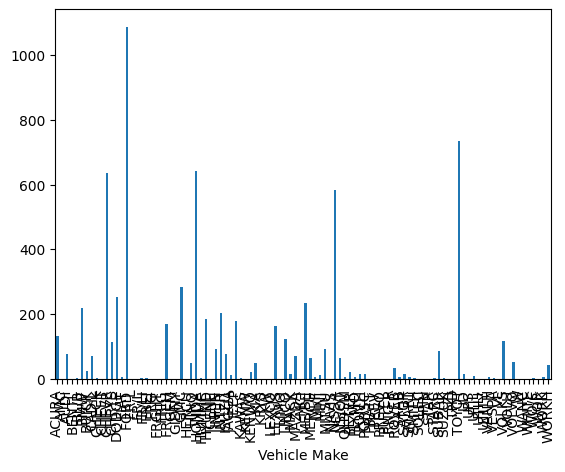

In [6]:
data4.groupby(["Vehicle Make"]).size().plot(kind="bar"); #mejor uno de barras

### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [7]:
color_mapping = { #Creamos un diccionario para mapear todos los terminos de colores a unos unificados
    'WH': 'WHITE', 'WT': 'WHITE', 'WHT': 'WHITE','WH/': 'WHITE','WHIT': 'WHITE','WHI': 'WHITE', 'W': 'WHITE', 'WTH': 'WHITE', 'WTH': 'WHITE', 'WGUTE': 'WHITE', 'GYW': 'WHITE',
    'BK': 'BLACK','BLK': 'BLACK','BLK/B': 'BLACK', 'DK/B': 'BLACK','DK/': 'BLACK', 'BKJ': 'BLACK', 
    'BL': 'BLUE','BLU': 'BLUE', 'DKB': 'BLUE', 'DKBL': 'BLUE','LTBL': 'BLUE', 'LTB': 'BLUE','WH-BL': 'BLUE', 
    'GY': 'GREY', 'GY/': 'GREY','GR': 'GREY', 'GY-GY': 'GREY','GRAY': 'GREY', 'BLG': 'GREY','GYGY': 'GREY', 'LTGY': 'GREY', 'DKGY': 'GREY','BLGY': 'GREY',
    'RD': 'RED','RD/': 'RED', 'BK-RD': 'RED', 'DKR': 'RED','R': 'RED','WHR': 'RED', 'RB': 'RED',
    'YW': 'YELLOW','YL': 'YELLOW','YELLO': 'YELLOW', 'YEL': 'YELLOW', 'YELOW': 'YELLOW', 'GRY': 'YELLOW',  
    'BR': 'BROWN','BROW': 'BROWN','BRN': 'BROWN','BRW': 'BROWN', 'GYBR': 'BROWN', 'BKBR': 'BROWN', 'BN': 'BROWN', 
    'SIL': 'SILVE','SILV': 'SILVE','SILVR': 'SILVE','SL': 'SILVE',
    'OR': 'ORANGE','ORANG': 'ORANGE',
    'PUR': 'PURPL',
    'BEIGE': 'TAN', 'TN': 'TAN', 'LT/': 'TAN', 'BG': 'TAN', 'GRT': 'TAN', 'GYT': 'TAN','GYTN': 'TAN', 'TNGR': 'TAN', 
    'GRN': 'GREEN','GN': 'GREEN', 'GRG': 'GREEN', 'DKG': 'GREEN','LTG': 'GREEN',
    'UNKNO': 'OTHER',
    'PR': 'PURPL', 'LTP': 'PURPL', 
    'GL': 'GOLD',    
}
data4['Vehicle Color'] = data4['Vehicle Color'].replace(color_mapping)
pd.set_option('display.max_rows', None)  # Muestra todas las filas
data4['Vehicle Color'].value_counts()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18852\148620355.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Vehicle Color'] = data4['Vehicle Color'].replace(color_mapping)


Vehicle Color
WHITE     2076
GREY      1690
BLACK     1375
BLUE       598
RED        423
BROWN      368
SILVE      181
TAN        168
YELLOW     126
GREEN       74
GOLD        65
OTHER       45
MR          23
ORANGE      16
PURPL       11
NOC          2
GREN         1
NOCL         1
B            1
VAN          1
TOPAZ        1
MC           1
BUS          1
Name: count, dtype: int64

### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

<Axes: xlabel='Vehicle Make'>

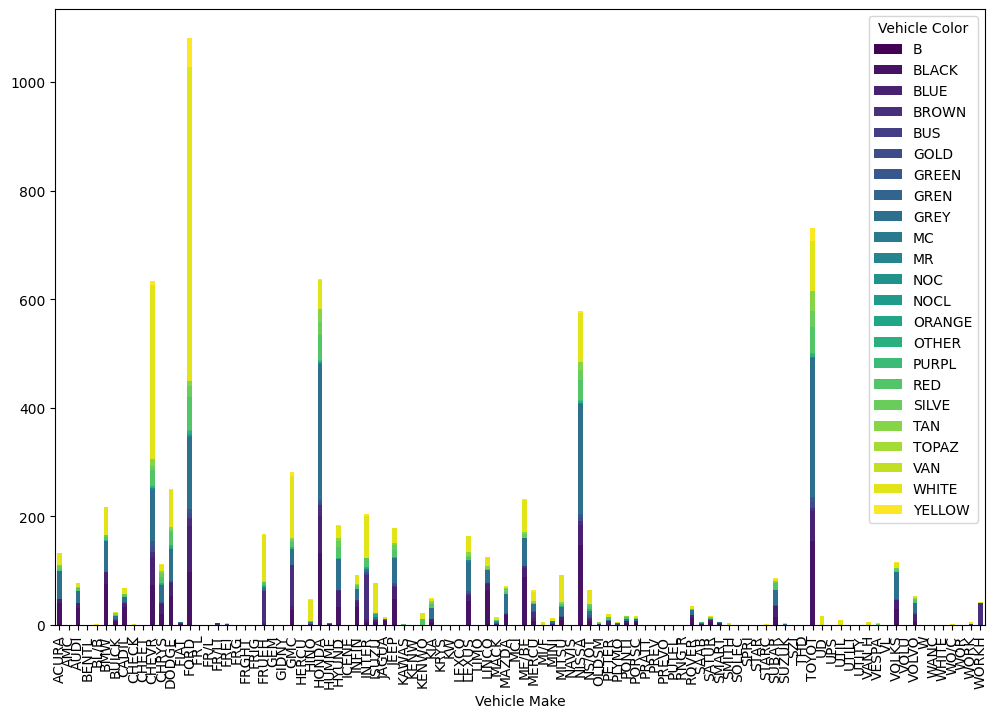

In [8]:
import matplotlib.pyplot as plt
counts = data4.groupby(['Vehicle Make', 'Vehicle Color']).size().unstack()
counts.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

https://github.com/rne280/Entrega2_2/blob/main/ProyectoPandas_Github.ipynb

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [21]:
from pandas import DatetimeIndex
import pandas as pd
data4 = data4.copy()
data4['Issue Date'] = pd.to_datetime(data4['Issue Date'], errors='coerce').copy()
indice_fecha = DatetimeIndex(data4['Issue Date'])
data4['Year-Month'] = indice_fecha.to_period('M')
multas = data4.groupby(['Violation Code', 'Year-Month']).size().reset_index(name='Num. multas')
print(multas)

     Violation Code Year-Month  Num. multas
0                 5    2013-06            1
1                 5    2013-07            8
2                 5    2013-08           14
3                 5    2013-09           31
4                 5    2013-10           12
5                 5    2013-11           15
6                 5    2013-12           12
7                 5    2014-01           17
8                 5    2014-02           15
9                 5    2014-03           27
10                7    2013-04            1
11                7    2013-07           20
12                7    2013-08           69
13                7    2013-09           54
14                7    2013-10           54
15                7    2013-11           43
16                7    2013-12           35
17                7    2014-01           31
18                7    2014-02           27
19                7    2014-03           44
20                7    2014-04           53
21                7    2014-05  

### J) Visualiza la anterior cuestión (I)

In [ ]:
data5 = multas.pivot(index='Year-Month', columns='Violation Code', values='Num. multas')
data5.plot(kind='bar', stacked=True, figsize=(12, 8))

<Axes: xlabel='Year-Month'>

### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'